<h3 style=color:magenta> Pré processamento dos dados</h3>

In [1]:
import pandas as pd

# Importar e processar os dados
df = pd.read_excel('https://raw.githubusercontent.com/AlanaMiranda/backpropagation/main/dadosmamografia.xlsx', header=None)

Xt = df.values[:,:5] # separar dados de entrada

yt = df.values[:,-1] # separar dados de saida
yt = yt.reshape(-1,1)


In [4]:
from backpropagation.preprocessamento import normalizar

(x_treino, y_treino), (x_validacao, y_validacao), (x_teste, y_teste) = normalizar(Xt, yt)

# Fazer transposta nos dados de entrada, para treino, validacao e teste
x_treino=x_treino.T
x_validacao = x_validacao.T
x_teste = x_teste.T

<h3 style=color:magenta> Execução do algoritmo</h3>

In [9]:
# Execução
from backpropagation.rna import backpropagation

treinar = backpropagation(x_treino, y_treino, x_validacao, y_validacao, 10, 'sigmoide', 0.001, epocas=10000)


Época 1/10000, 	 | Erro_tr: 0.25172714915184785, 	 | Erro_val: 0.2523420999104683
Época 1001/10000, 	 | Erro_tr: 0.1974137947398703, 	 | Erro_val: 0.19544353062322842
Época 2001/10000, 	 | Erro_tr: 0.15048837258692072, 	 | Erro_val: 0.14818957970736107
Época 3001/10000, 	 | Erro_tr: 0.1359022126566384, 	 | Erro_val: 0.1415764322717854
Época 4001/10000, 	 | Erro_tr: 0.125436587624656, 	 | Erro_val: 0.14049879022778014
Época 5001/10000, 	 | Erro_tr: 0.11841461256675698, 	 | Erro_val: 0.13816910549401892
Época 6001/10000, 	 | Erro_tr: 0.1139640300253003, 	 | Erro_val: 0.13555476022549207
Época 7001/10000, 	 | Erro_tr: 0.11114274667370198, 	 | Erro_val: 0.13383782657596188
Época 8001/10000, 	 | Erro_tr: 0.10931296272278183, 	 | Erro_val: 0.13302791567837824
Treinamento finalizado por validação cruzada após 8329 épocas.


<h3 style=color:magenta> Matriz de confusão e outras métricas</h3>

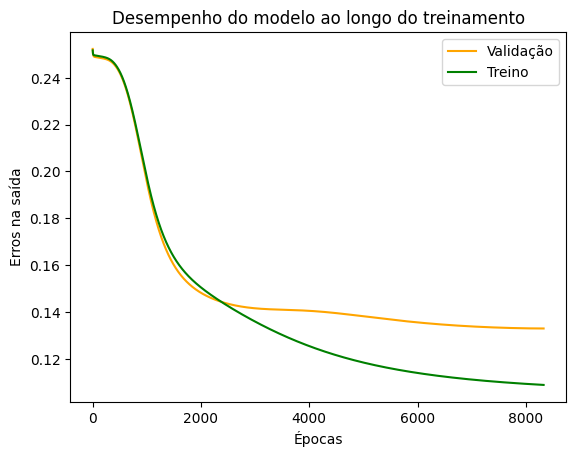

In [10]:
from backpropagation.avaliacoes import grafico

# Gráfico 
grafico(treinar)

In [11]:
from backpropagation.avaliacoes import previsao

# Fazer previsões
y_prev = previsao(treinar, x_teste)

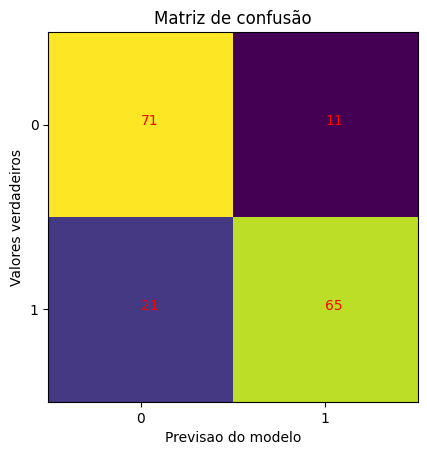

In [12]:
from backpropagation.avaliacoes import matriz_confusao

# Matriz de confusão
matriz_confusao(y_teste, y_prev)


In [13]:
from backpropagation.avaliacoes import acuracia

# Acurácia
acuracia(y_teste, y_prev)


0.8095238095238095